AIE21117

A1.Use numpy.fft.fft()to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.Use numpy.fft.ifft()to inverse transform the frequency spectrumto time domain signal.

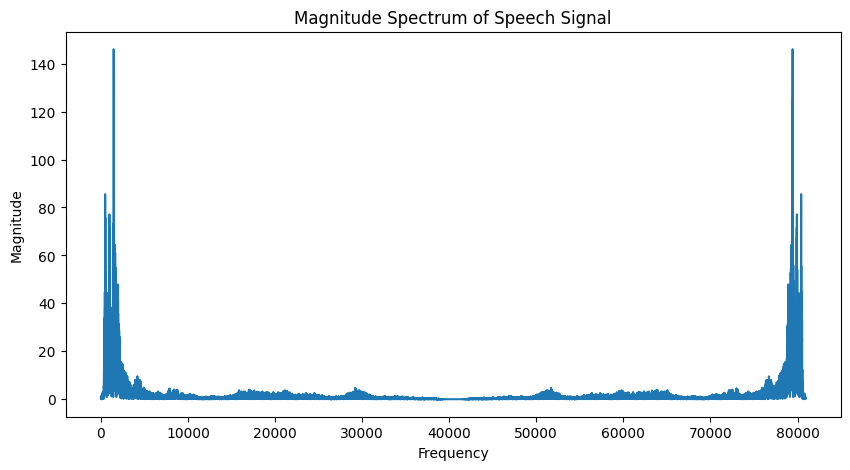

In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load('/content/drive/MyDrive/mahesh.wav')
# Perform Fourier Transform
Y = np.fft.fft(y)
# Magnitude of spectrum
magnitude_spectrum = np.abs(Y)

# Amplitude of spectral components
plt.figure(figsize=(10, 5))
plt.plot(magnitude_spectrum)
plt.title('Magnitude Spectrum of Speech Signal')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


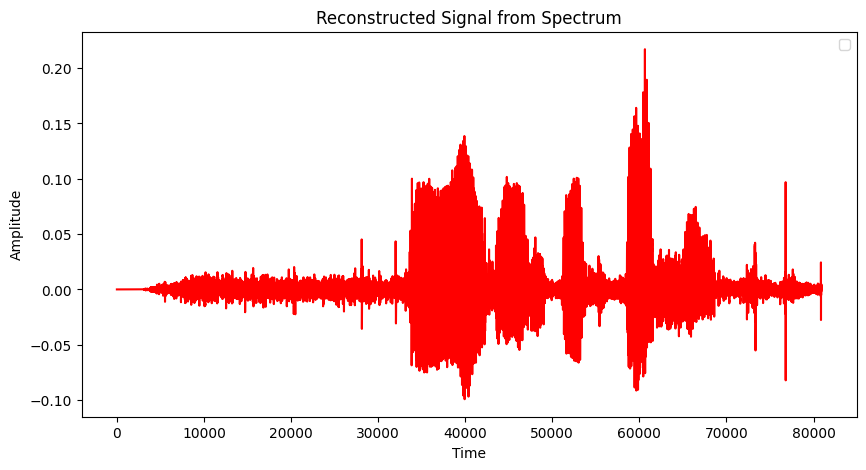

In [3]:
# Inverse Transform (time domain)
y_reconstructed = np.fft.ifft(Y)

# Plot the reconstructed signal
plt.figure(figsize=(10, 5))
plt.plot(y_reconstructed, color='r')
plt.title('Reconstructed Signal from Spectrum')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

A2. Use a rectangular window to select the low frequency components from your spectrum.Inverse transform the filtered spectrum and listen to this sound. Repeat the same for band pass and high pass frequencies of spectrum.

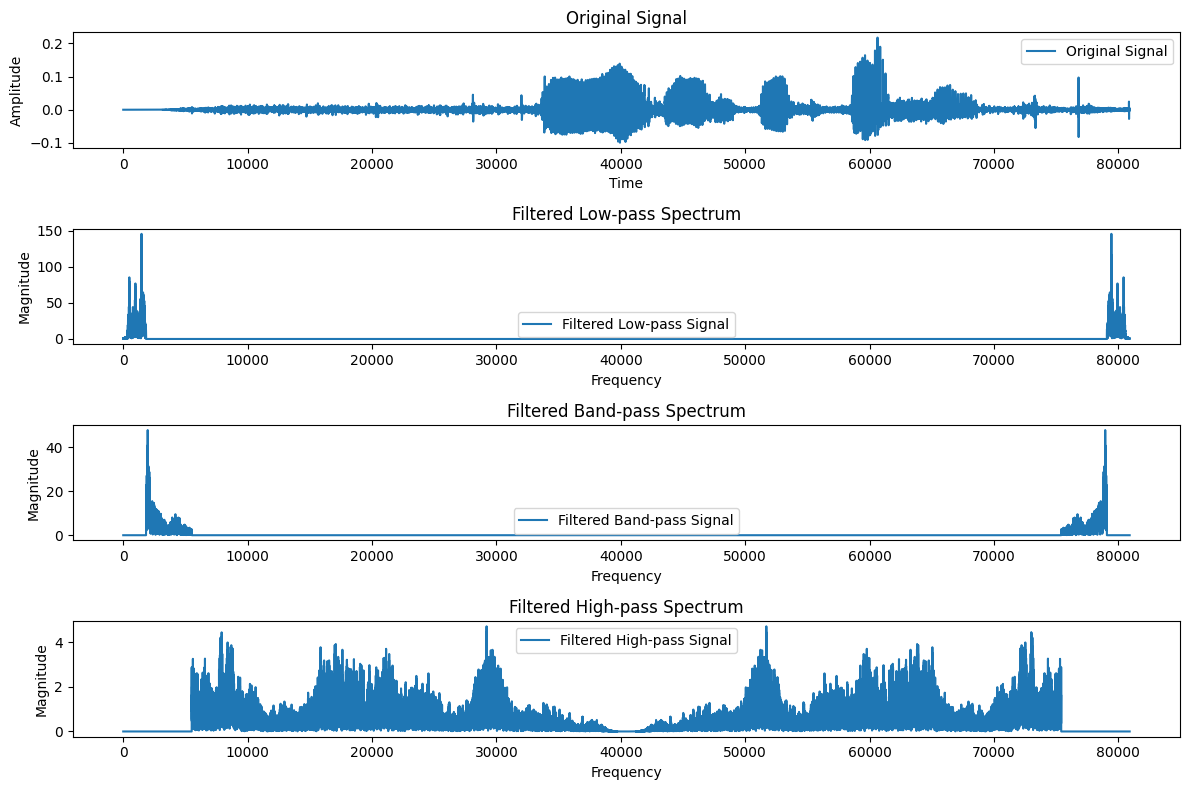

In [4]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load('/content/drive/MyDrive/mahesh.wav')

# Perform Fourier Transform
Y = np.fft.fft(y)

# Calculate the magnitude of the spectral components
magnitude_spectrum = np.abs(Y)

# Frequency axis
freq_axis = np.fft.fftfreq(len(Y), 1/sr)

# Create rectangular window functions for filtering
def low_pass_filter(freqs, cutoff_freq):
    return (np.abs(freqs) <= cutoff_freq).astype(float)

def band_pass_filter(freqs, low_cutoff, high_cutoff):
    return ((np.abs(freqs) >= low_cutoff) & (np.abs(freqs) <= high_cutoff)).astype(float)

def high_pass_filter(freqs, cutoff_freq):
    return (np.abs(freqs) >= cutoff_freq).astype(float)

# Define cutoff frequencies for the filters
low_cutoff = 500  # Low-pass filter cutoff
band_low_cutoff = 500  # Band-pass filter low cutoff
band_high_cutoff = 1500  # Band-pass filter high cutoff
high_cutoff = 1500  # High-pass filter cutoff

# Apply the filters to the spectrum
low_pass_mask = low_pass_filter(freq_axis, low_cutoff)
band_pass_mask = band_pass_filter(freq_axis, band_low_cutoff, band_high_cutoff)
high_pass_mask = high_pass_filter(freq_axis, high_cutoff)

# Filter the spectrum
filtered_low_pass = Y * low_pass_mask
filtered_band_pass = Y * band_pass_mask
filtered_high_pass = Y * high_pass_mask

# Inverse Transform to get back the time domain signals
y_low_pass = np.fft.ifft(filtered_low_pass)
y_band_pass = np.fft.ifft(filtered_band_pass)
y_high_pass = np.fft.ifft(filtered_high_pass)

# Plot the original and filtered signals
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(y, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(np.abs(filtered_low_pass), label='Filtered Low-pass Signal')
plt.title('Filtered Low-pass Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(np.abs(filtered_band_pass), label='Filtered Band-pass Signal')
plt.title('Filtered Band-pass Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(np.abs(filtered_high_pass), label='Filtered High-pass Signal')
plt.title('Filtered High-pass Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

plt.tight_layout()
plt.show()



In [5]:
import IPython.display as ipd
# Print the audio using ipython display
print("Low Pass filter:")
ipd.display(ipd.Audio(y_low_pass, rate=sr))
print("Band Pass filter:")
ipd.display(ipd.Audio(y_band_pass, rate=sr))
print("High Pass filter:")
ipd.display(ipd.Audio(y_high_pass, rate=sr))

Low Pass filter:


/usr/local/lib/python3.10/dist-packages/IPython/lib/display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


Band Pass filter:


High Pass filter:


A3. Repeat A2 with other filter types such as Cosine / Gausian filters.

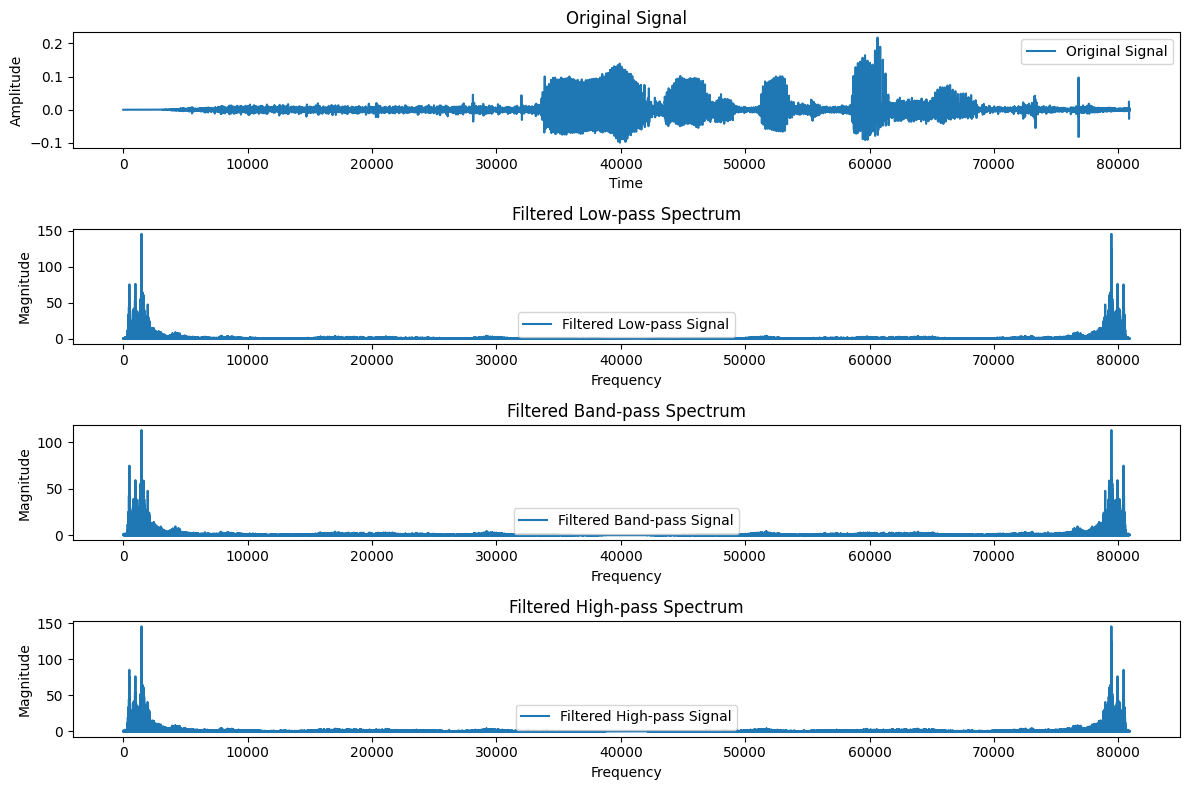

In [6]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load('/content/drive/MyDrive/mahesh.wav')

# Perform Fourier Transform
Y = np.fft.fft(y)

# Calculate the magnitude of the spectral components
magnitude_spectrum = np.abs(Y)

# Frequency axis
freq_axis = np.fft.fftfreq(len(Y), 1/sr)

# Create rectangular window functions for filtering
def low_pass_filter(freqs, cutoff_freq):
    return (np.cos(np.pi * freqs * cutoff_freq / 2) > 0).astype(float)

def band_pass_filter(freqs, low_cutoff, high_cutoff):
    return ((np.cos(np.pi * freqs * low_cutoff / 2) > 0) & (np.cos(np.pi * freqs * high_cutoff / 2) > 0)).astype(float)

def high_pass_filter(freqs, cutoff_freq):
    return (np.cos(np.pi * freqs * cutoff_freq / 2) < 0).astype(float)


# Define cutoff frequencies for the filters
low_cutoff = 500  # Low-pass filter cutoff
band_low_cutoff = 500  # Band-pass filter low cutoff
band_high_cutoff = 1500  # Band-pass filter high cutoff
high_cutoff = 1500  # High-pass filter cutoff

# Apply the filters to the spectrum
low_pass_mask = low_pass_filter(freq_axis, low_cutoff)
band_pass_mask = band_pass_filter(freq_axis, band_low_cutoff, band_high_cutoff)
high_pass_mask = high_pass_filter(freq_axis, high_cutoff)

# Filter the spectrum
filtered_low_pass = Y * low_pass_mask
filtered_band_pass = Y * band_pass_mask
filtered_high_pass = Y * high_pass_mask

# Inverse Transform to get back the time domain signals
y_low_pass = np.fft.ifft(filtered_low_pass)
y_band_pass = np.fft.ifft(filtered_band_pass)
y_high_pass = np.fft.ifft(filtered_high_pass)

# Plot the original and filtered signals
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(y, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(np.abs(filtered_low_pass), label='Filtered Low-pass Signal')
plt.title('Filtered Low-pass Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(np.abs(filtered_band_pass), label='Filtered Band-pass Signal')
plt.title('Filtered Band-pass Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(np.abs(filtered_high_pass), label='Filtered High-pass Signal')
plt.title('Filtered High-pass Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
import IPython.display as ipd
# Print the audio using ipython display
print("Low Pass filter:")
ipd.display(ipd.Audio(y_low_pass, rate=sr))
print("Band Pass filter:")
ipd.display(ipd.Audio(y_band_pass, rate=sr))
print("High Pass filter:")
ipd.display(ipd.Audio(y_high_pass, rate=sr))

Low Pass filter:


Band Pass filter:


High Pass filter:
